## Code required to create Figure 2
*From "Exploring uncertainty of trends in the lower-tropospheric North Pacific Jet."* 

Entire notebook takes: 41 seconds on Intel i7-10750 using > 4GB RAM


In [1]:
import datetime
import numpy as np
import pandas as pd
import xarray as xr
from statsmodels.tsa.stattools import adfuller ## Augmented Dickey-Fuller test for non-stationarity in time series
from statsmodels.tsa.seasonal import seasonal_decompose
import pymannkendall

## Plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
START_YEAR = "1980"
END_YEAR = "2023"
SEASONS = ['DJF', 'MAM', 'JJA', 'SON']

In [3]:
METRIC_NAMES = ["Woollings et al. 2010", "Barnes & Polvani 2013", "Grise & Polvani 2014",
                "Barnes & Simpson 2017", "Bracegirdle et al. 2018", "Zappa et al. 2018", "Kerr et al. 2020"]
METRIC_DATA_NAMES = ['Woollings2010_NorthPacific', 'BarnesPolvani2013_NorthPacific', 'GrisePolvani2014_NorthPacific',
                     'BarnesSimpson2017_NorthPacific', 'Bracegirdle2018_NorthPacific', 'Zappa2018_NorthPacific',\
                     'Kerr2020_NorthPacific']

In [4]:
METRIC_LABEL_RENAMER = dict(zip(METRIC_DATA_NAMES, METRIC_NAMES))

## Load Reanalysis

In [5]:
era_npac_day_dict = {}

era_npac_day_dict['Woollings2010_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Woollings et al. 2010 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['BarnesPolvani2013_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Barnes & Polvani 2013 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['GrisePolvani2014_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Grise & Polvani 2014 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['BarnesPolvani2015_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Barnes & Polvani 2015 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['BarnesSimpson2017_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Barnes & Simpson 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['Bracegirdle2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Bracegirdle et al. 2018 North Pacific.csv', index_col='year')
era_npac_day_dict['Zappa2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Zappa et al. 2018 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['Kerr2020_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Kerr et al. 2020 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]


In [6]:
jra55_npac_day_dict = {}

jra55_npac_day_dict['Woollings2010_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Woollings et al. 2010 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['BarnesPolvani2013_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Barnes & Polvani 2013 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['GrisePolvani2014_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Grise & Polvani 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['BarnesPolvani2015_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Barnes & Polvani 2015 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['BarnesSimpson2017_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Barnes & Simpson 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['Bracegirdle2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Bracegirdle et al. 2018 North Pacific.csv', index_col='year')
jra55_npac_day_dict['Zappa2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Zappa et al. 2018 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['Kerr2020_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Kerr et al. 2020 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]


In [7]:
merra2_npac_day_dict = {}

merra2_npac_day_dict['Woollings2010_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Woollings et al. 2010 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['BarnesPolvani2013_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Barnes & Polvani 2013 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['GrisePolvani2014_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Grise & Polvani 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['BarnesPolvani2015_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Barnes & Polvani 2015 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['BarnesSimpson2017_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Barnes & Simpson 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['Bracegirdle2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Bracegirdle et al. 2018 North Pacific.csv', index_col='year')
merra2_npac_day_dict['Zappa2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Zappa et al. 2018 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['Kerr2020_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Kerr et al. 2020 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]


In [8]:
ncepdoe2_npac_day_dict = {}

ncepdoe2_npac_day_dict['Woollings2010_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Woollings et al. 2010 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['BarnesPolvani2013_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Barnes & Polvani 2013 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['GrisePolvani2014_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Grise & Polvani 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['BarnesPolvani2015_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Barnes & Polvani 2015 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['BarnesSimpson2017_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Barnes & Simpson 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['Bracegirdle2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Bracegirdle et al. 2018 North Pacific.csv', index_col='year')
ncepdoe2_npac_day_dict['Zappa2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Zappa et al. 2018 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['Kerr2020_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Kerr et al. 2020 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]


# Make Figure 2

In [9]:
### required functions for calculating gradient/trend
def get_linear_reg_slope(data, col_name):
    lin_reg_data = prepare_data_for_linear_reg(data, col_name)
    return linear_reg_slope(lin_reg_data)


def prepare_data_for_linear_reg(data, col_name):
    values = data[col_name].values.astype(float)
    ordinal_dates = get_ordinal_dates(data)
    lin_reg_data = pd.DataFrame([values, ordinal_dates]).T
    lin_reg_data = lin_reg_data.dropna()
    return lin_reg_data


def get_ordinal_dates(data, index_col_name='time'):
    return pd.to_datetime(data.reset_index()[index_col_name]).apply(lambda date: date.toordinal())


def linear_reg_slope(data):
    """
        data[0] should be values, data[1] should be ordinal dates
    """
    slope, intercept = np.polyfit(data[1], data[0], 1)
    lr1d = np.poly1d([slope, intercept])(data[1])
    return pd.DataFrame(lr1d, index=data[1].apply(lambda row: pd.to_datetime(datetime.date.fromordinal(int(row)))), columns=['reg_line'])

def get_year_gradient_of_trend(data, jet_lat_name='jet_lat', proportion_threshold_for_missing_data=4):
    """
        TODO: fix ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None
    """
    try:
        cdata = data.dropna()
        lin_reg_line = get_linear_reg_slope(data, jet_lat_name)
        year_gradient = (lin_reg_line['reg_line'][-1] - lin_reg_line['reg_line'][0]) / (lin_reg_line.index.year[-1]  - lin_reg_line.index.year[0])
        return year_gradient
    except ValueError as ve:
        print(ve)
        pass
    try:
        assert float(data.isnull().sum(axis=0)) < (len(data)/proportion_threshold_for_missing_data)
        data = data.fillna(data.mean())
        lin_reg_line = get_linear_reg_slope(data, jet_lat_name)
        year_gradient = (lin_reg_line['reg_line'][-1] - lin_reg_line['reg_line'][0]) / (lin_reg_line.index.year[-1]  - lin_reg_line.index.year[0])
        return year_gradient
    except AssertionError as ae:
        print(f"{data.name}failed. {int(data.isnull().sum(axis=0))} out of {len(data)} data points missing")
        return np.nan

## Get trend and mean by season

In [10]:
SIG_PVALUE = 0.05

In [11]:
%%time
## Takes ~30 seconds on Intel i7-10750
reanalysis_data = [era_npac_day_dict, jra55_npac_day_dict, merra2_npac_day_dict, ncepdoe2_npac_day_dict]
reanalysis_names = ["ERA-5", "JRA-55", "MERRA-2", "NCEP/DOE II"]
djf_jet_lat_mean_dict = {}
mam_jet_lat_mean_dict = {}
jja_jet_lat_mean_dict = {}
son_jet_lat_mean_dict = {}
djf_jet_lat_trend_dict = {}
mam_jet_lat_trend_dict = {}
jja_jet_lat_trend_dict = {}
son_jet_lat_trend_dict = {}
djf_jet_lat_trend_sig_dict = {}
mam_jet_lat_trend_sig_dict = {}
jja_jet_lat_trend_sig_dict = {}
son_jet_lat_trend_sig_dict = {}
for ind, reanalysis_set in enumerate(reanalysis_data):
    reanalysis_name = reanalysis_names[ind]
    djf_jet_lat_mean_dict[reanalysis_name] = {}
    mam_jet_lat_mean_dict[reanalysis_name] = {}
    jja_jet_lat_mean_dict[reanalysis_name] = {}
    son_jet_lat_mean_dict[reanalysis_name] = {}
    djf_jet_lat_trend_dict[reanalysis_name] = {}
    mam_jet_lat_trend_dict[reanalysis_name] = {}
    jja_jet_lat_trend_dict[reanalysis_name] = {}
    son_jet_lat_trend_dict[reanalysis_name] = {}
    djf_jet_lat_trend_sig_dict[reanalysis_name] = {}
    mam_jet_lat_trend_sig_dict[reanalysis_name] = {}
    jja_jet_lat_trend_sig_dict[reanalysis_name] = {}
    son_jet_lat_trend_sig_dict[reanalysis_name] = {}
    print(reanalysis_name)
    for metric in METRIC_DATA_NAMES:
        reanalysis_set[metric].index = pd.to_datetime(reanalysis_set[metric].index)
    
        if metric == "Bracegirdle2018_NorthPacific":
            ## ignore because only calculated by annual scale
            continue
        else:
            djf_jet_lat_mean_dict[reanalysis_name][metric] = float(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([12, 1, 2])]['jet_lat'].mean())
            mam_jet_lat_mean_dict[reanalysis_name][metric] = float(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([3, 4, 5])]['jet_lat'].mean())
            jja_jet_lat_mean_dict[reanalysis_name][metric] = float(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([6, 7, 8])]['jet_lat'].mean())
            son_jet_lat_mean_dict[reanalysis_name][metric] = float(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([9, 10, 11])]['jet_lat'].mean())
   
            # djf_jet_lat_trend_dict[reanalysis_name][metric] = get_year_gradient_of_trend(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([12, 1, 2])])
            # mam_jet_lat_trend_dict[reanalysis_name][metric] = get_year_gradient_of_trend(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([3, 4, 5])])
            # jja_jet_lat_trend_dict[reanalysis_name][metric] = get_year_gradient_of_trend(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([6, 7, 8])])
            # son_jet_lat_trend_dict[reanalysis_name][metric] = get_year_gradient_of_trend(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([9, 10, 11])])
            
            reanalysis_set_monthly = reanalysis_set[metric].resample('1m').mean()
            
            djf_jet_lat_trend_dict[reanalysis_name][metric] = pymannkendall.original_test(reanalysis_set_monthly[reanalysis_set_monthly.index.month.isin([12, 1, 2])]).slope * 3
            mam_jet_lat_trend_dict[reanalysis_name][metric] = pymannkendall.original_test(reanalysis_set_monthly[reanalysis_set_monthly.index.month.isin([3, 4, 5])]).slope * 3
            jja_jet_lat_trend_dict[reanalysis_name][metric] = pymannkendall.original_test(reanalysis_set_monthly[reanalysis_set_monthly.index.month.isin([6, 7, 8])]).slope * 3
            son_jet_lat_trend_dict[reanalysis_name][metric] = pymannkendall.original_test(reanalysis_set_monthly[reanalysis_set_monthly.index.month.isin([9, 10, 11])]).slope * 3
            
            print(pymannkendall.original_test(reanalysis_set_monthly[reanalysis_set_monthly.index.month.isin([12, 1, 2])]).slope * 3, get_year_gradient_of_trend(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([12, 1, 2])]))
            djf_jet_lat_trend_sig_dict[reanalysis_name][metric] = pymannkendall.original_test(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([12, 1, 2])]).p < SIG_PVALUE
            mam_jet_lat_trend_sig_dict[reanalysis_name][metric] = pymannkendall.original_test(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([3, 4, 5])]).p < SIG_PVALUE
            jja_jet_lat_trend_sig_dict[reanalysis_name][metric] = pymannkendall.original_test(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([6, 7, 8])]).p < SIG_PVALUE
            son_jet_lat_trend_sig_dict[reanalysis_name][metric] = pymannkendall.original_test(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([9, 10, 11])]).p < SIG_PVALUE


ERA-5
0.07262728187321504 0.07105971971448287
0.0851199002588492 0.0764928972414137
0.07970423354523418 0.07714127097310436
0.08500602167804079 0.07245267515673079
0.06597517219086227 0.06309737423140134
0.04484335552233583 0.045729953868484496
JRA-55
0.06048387096774259 0.06077562818693409
0.0675750046534192 0.06270324116896628
0.0834063535517777 0.08006408464305537
0.07683873144399452 0.06554769254952728
0.06549008091942474 0.0630878825094326
0.04635605155671746 0.04637474286236435
MERRA-2
0.05227433173715293 0.056095927325029514
0.06772941349714759 0.061627238761196454
0.07126032599525498 0.06793480996650067
0.06546717171717173 0.05798420740211711
0.05339209785215606 0.05317330725127721
0.03353682261684738 0.03200376926551113
NCEP/DOE II
0.05700080433703643 0.06023660198208686
0.070003600779463 0.06443590706743035
0.07197004608294912 0.06889836215455196
0.06756756756756732 0.05783648518589772
0.06341225946164898 0.05990338566969403
0.046526163981275674 0.045279958721592836
CPU times

In [12]:
def format_dict_to_dataframe(jet_lat_dict, unique_col_name):
    jet_lat_df = pd.DataFrame(jet_lat_dict)
    jet_lat_df = jet_lat_df.stack().reset_index()
    jet_lat_df.columns = ["Metric", "Dataset", unique_col_name]
    ## rename metric name to formatted version
    jet_lat_df['Metric'] = jet_lat_df.Metric.apply(lambda row: METRIC_LABEL_RENAMER[row])
    ## include decade trend 
    if 'trend' in unique_col_name.lower():
        jet_lat_df[unique_col_name+'_decade'] = jet_lat_df[unique_col_name]*10
    return jet_lat_df

In [13]:
djf_jet_lat_mean_df = format_dict_to_dataframe(djf_jet_lat_mean_dict, "DJF Mean")
djf_jet_lat_trend_df = format_dict_to_dataframe(djf_jet_lat_trend_dict, "DJF Trend")
djf_jet_lat_trend_sig_df = format_dict_to_dataframe(djf_jet_lat_trend_sig_dict, "DJF Trend <0.05")

mam_jet_lat_mean_df = format_dict_to_dataframe(mam_jet_lat_mean_dict, "MAM Mean")
mam_jet_lat_trend_df = format_dict_to_dataframe(mam_jet_lat_trend_dict, "MAM Trend")
mam_jet_lat_trend_sig_df = format_dict_to_dataframe(mam_jet_lat_trend_sig_dict, "MAM Trend <0.05")

jja_jet_lat_mean_df = format_dict_to_dataframe(jja_jet_lat_mean_dict, "JJA Mean")
jja_jet_lat_trend_df = format_dict_to_dataframe(jja_jet_lat_trend_dict, "JJA Trend")
jja_jet_lat_trend_sig_df = format_dict_to_dataframe(jja_jet_lat_trend_sig_dict, "JJA Trend <0.05")

son_jet_lat_mean_df = format_dict_to_dataframe(son_jet_lat_mean_dict, "SON Mean")
son_jet_lat_trend_df = format_dict_to_dataframe(son_jet_lat_trend_dict, "SON Trend")
son_jet_lat_trend_sig_df = format_dict_to_dataframe(son_jet_lat_trend_sig_dict, "SON Trend <0.05")


In [14]:
## merge all
allseasons_jet_lat_mean_df = djf_jet_lat_mean_df.merge(mam_jet_lat_mean_df)
allseasons_jet_lat_mean_df = allseasons_jet_lat_mean_df.merge(jja_jet_lat_mean_df)
allseasons_jet_lat_mean_df = allseasons_jet_lat_mean_df.merge(son_jet_lat_mean_df)

allseasons_jet_lat_trend_df = djf_jet_lat_trend_df.merge(mam_jet_lat_trend_df)
allseasons_jet_lat_trend_df = allseasons_jet_lat_trend_df.merge(jja_jet_lat_trend_df)
allseasons_jet_lat_trend_df = allseasons_jet_lat_trend_df.merge(son_jet_lat_trend_df)

allseasons_jet_lat_trend_sig_df = djf_jet_lat_trend_sig_df.merge(mam_jet_lat_trend_sig_df)
allseasons_jet_lat_trend_sig_df = allseasons_jet_lat_trend_sig_df.merge(jja_jet_lat_trend_sig_df)
allseasons_jet_lat_trend_sig_df = allseasons_jet_lat_trend_sig_df.merge(son_jet_lat_trend_sig_df)

allseasons_jet_lat_mean_and_trend_df = allseasons_jet_lat_mean_df.merge(allseasons_jet_lat_trend_df)
allseasons_jet_lat_mean_and_trend_sig_df = allseasons_jet_lat_mean_and_trend_df.merge(allseasons_jet_lat_trend_sig_df)

### Workout range of uncertainty across dataset and metric 

In [15]:
allseasons_jet_lat_trend_df.min(), allseasons_jet_lat_trend_df.max()

(Metric              Barnes & Polvani 2013
 Dataset                             ERA-5
 DJF Trend                        0.033537
 DJF Trend_decade                 0.335368
 MAM Trend                       -0.021241
 MAM Trend_decade                 -0.21241
 JJA Trend                       -0.006977
 JJA Trend_decade                -0.069773
 SON Trend                       -0.003595
 SON Trend_decade                -0.035946
 dtype: object,
 Metric              Zappa et al. 2018
 Dataset                   NCEP/DOE II
 DJF Trend                     0.08512
 DJF Trend_decade             0.851199
 MAM Trend                    0.016084
 MAM Trend_decade             0.160842
 JJA Trend                    0.073529
 JJA Trend_decade             0.735294
 SON Trend                    0.025623
 SON Trend_decade             0.256233
 dtype: object)

In [16]:
allseasons_jet_lat_trend_df

,Metric,Dataset,DJF Trend,DJF Trend_decade,MAM Trend,MAM Trend_decade,JJA Trend,JJA Trend_decade,SON Trend,SON Trend_decade
0,Woollings et al. 2010,ERA-5,0.072627,0.726273,0.004779,0.047795,0.039023,0.390234,0.001006,0.010057
1,Woollings et al. 2010,JRA-55,0.060484,0.604839,0.011810,0.118102,0.055315,0.553150,0.014813,0.148130
2,Woollings et al. 2010,MERRA-2,0.052274,0.522743,-0.002505,-0.025054,0.032462,0.324622,0.013095,0.130952
3,Woollings et al. 2010,NCEP/DOE II,0.057001,0.570008,-0.011243,-0.112428,0.029135,0.291345,0.003929,0.039286
4,Barnes & Polvani 2013,ERA-5,0.085120,0.851199,0.004754,0.047545,0.034356,0.343562,-0.003595,-0.035946
5,Barnes & Polvani 2013,JRA-55,0.067575,0.675750,0.009902,0.099017,0.060928,0.609283,0.013864,0.138641
6,Barnes & Polvani 2013,MERRA-2,0.067729,0.677294,-0.000150,-0.001504,0.031355,0.313551,0.017900,0.179000
7,Barnes & Polvani 2013,NCEP/DOE II,0.070004,0.700036,-0.007840,-0.078396,0.026308,0.263080,0.011208,0.112077
8,Grise & Polvani 2014,ERA-5,0.079704,0.797042,0.009386,0.093864,0.024446,0.244464,0.025623,0.256233
9,Grise & Polvani 2014,JRA-55,0.083406,0.834064,0.015603,0.156033,0.042002,0.420024,0.024038,0.240382


In [17]:
dataset_maximums = allseasons_jet_lat_trend_df.groupby('Dataset').max()
dataset_minimums = allseasons_jet_lat_trend_df.groupby('Dataset').min()

metric_maximums = allseasons_jet_lat_trend_df.groupby('Metric').max()
metric_minimums = allseasons_jet_lat_trend_df.groupby('Metric').min()

In [18]:
## get min and max ranges
seasonal_dataset_range = {}
seasonal_metric_range = {}
for col in dataset_maximums.columns[1:]:
    if 'Trend_decade' in col:
        current_season = col[:3]
        seasonal_dataset_range[current_season] = []
        seasonal_metric_range[current_season] = []
        seasonal_dataset_range[current_season].append((dataset_maximums[col] - dataset_minimums[col]).min())
        seasonal_dataset_range[current_season].append((dataset_maximums[col] - dataset_minimums[col]).max())
        seasonal_metric_range[current_season].append((metric_maximums[col] - metric_minimums[col]).min())
        seasonal_metric_range[current_season].append((metric_maximums[col] - metric_minimums[col]).max())


In [19]:
seasonal_metric_range # shows reanalysis uncertainty (i.e. difference between max and min metrics per data) 

{'DJF': [0.1214602755652272, 0.2035295013606212],
 'MAM': [0.12007327893730366, 0.23052933664088243],
 'JJA': [0.260532412549555, 0.5269607843137214],
 'SON': [0.07519222071460771, 0.21494578650318433]}

In [20]:
seasonal_dataset_range # shows metric uncertainty (i.e. difference between max and min) 

{'DJF': [0.2544388210167344, 0.40276544736513376],
 'MAM': [0.15603282399547322, 0.24488115085171702],
 'JJA': [0.31047889923353644, 0.5445349875070584],
 'SON': [0.1385961558056174, 0.2921787259261567]}

In [21]:
MARKER_LIST = ['o', 'X', '^', 'P', (4, 1, 0), (4, 0, 45)]

In [22]:
def make_trend_kde_and_scatter_plot(allseason_data, column_to_use, ax, use_legend=False):
    sns.kdeplot(allseason_data[column_to_use], ax=ax, linewidth=6, alpha=.5)
    num_of_metrics = len(allseason_data.loc[allseason_data['Dataset'] == 'ERA-5'])
    sns.scatterplot(x=column_to_use, y=[1.1]*num_of_metrics, style='Metric', s=100, data=allseason_data.loc[allseason_data['Dataset'] == 'ERA-5'], ax=ax, markers=MARKER_LIST, legend=False)
    sns.scatterplot(x=column_to_use, y=[0.8]*num_of_metrics, style='Metric', s=100, data=allseason_data.loc[allseason_data['Dataset'] == 'JRA-55'], ax=ax, markers=MARKER_LIST, legend=False)
    sns.scatterplot(x=column_to_use, y=[0.5]*num_of_metrics, style='Metric', s=100, data=allseason_data.loc[allseason_data['Dataset'] == 'MERRA-2'], ax=ax, markers=MARKER_LIST, legend=False)
    sns.scatterplot(x=column_to_use, y=[0.2]*num_of_metrics, style='Metric', s=100, data=allseason_data.loc[allseason_data['Dataset'] == 'NCEP/DOE II'], ax=ax, markers=MARKER_LIST, legend=use_legend)
    ax.set_xlabel(r"Trend ${(\circ N^{-decade})}$", size=16)
    ax.set_ylabel("Density", size=16)
    
def make_trend_kde(allseason_data, column_to_use, ax, ymax, labels=True):
    sns.kdeplot(allseason_data[column_to_use], ax=ax, linewidth=6, alpha=.5)
    ax.set_xlabel(r"Trend ${(\circ N^{-decade})}$", size=16)
    ax.set_ylabel("Density", size=16)
    ax.set_ylim(0, ymax)
    ax.set_yticks(np.arange(0.5, ymax))
    ax.grid(True)
    ax.vlines(0, 0, ymax, color='k', linewidth=2, linestyle='--', alpha=.4)
    if not labels:
        ax.set_ylabel("")
        ax.get_yaxis().set_ticklabels([])
    
def make_reanalysis_scatter(allseason_data, column_to_use, ax, use_legend=False, labels=True, alpha=1.):
    num_of_metrics = len(allseason_data.loc[allseason_data['Dataset'] == 'ERA-5'])
    
    sns.scatterplot(x=column_to_use, y=[4]*num_of_metrics, style='Metric', s=70, data=allseason_data.loc[allseason_data['Dataset'] == 'ERA-5'], markers=MARKER_LIST, alpha=alpha, ax=ax, color='C0', legend=False)
    sns.scatterplot(x=column_to_use, y=[3]*num_of_metrics, style='Metric', s=70, data=allseason_data.loc[allseason_data['Dataset'] == 'JRA-55'], markers=MARKER_LIST, alpha=alpha, ax=ax, color='C1', legend=False)
    sns.scatterplot(x=column_to_use, y=[2]*num_of_metrics, style='Metric', s=70, data=allseason_data.loc[allseason_data['Dataset'] == 'MERRA-2'], markers=MARKER_LIST, alpha=alpha, ax=ax, color='C2', legend=False)
    sns.scatterplot(x=column_to_use, y=[1]*num_of_metrics, style='Metric', s=70, data=allseason_data.loc[allseason_data['Dataset'] == 'NCEP/DOE II'], markers=MARKER_LIST, alpha=alpha, ax=ax, color='C3', legend=use_legend)
    ax.vlines(0, 0, 5, color='k', linewidth=2, linestyle='--', alpha=.4)
    ax.set_ylim(0.5, 4.5)
    ax.set_yticks(np.arange(0, 6))
    ax.set_yticklabels(["", "NCEP/DOE II", "MERRA-2", "JRA-55", "ERA5", ""])
    ax.grid(axis='x')
    if not labels:
        ax.get_yaxis().set_ticklabels([])

In [23]:
allseasons_jet_lat_mean_and_trend_sig_df['DJF Trend_decade_sig'] = allseasons_jet_lat_mean_and_trend_sig_df.apply(lambda row: row['DJF Trend_decade'] if row['DJF Trend <0.05'] else np.nan, axis=1)
allseasons_jet_lat_mean_and_trend_sig_df['MAM Trend_decade_sig'] = allseasons_jet_lat_mean_and_trend_sig_df.apply(lambda row: row['MAM Trend_decade'] if row['MAM Trend <0.05'] else np.nan, axis=1)
allseasons_jet_lat_mean_and_trend_sig_df['JJA Trend_decade_sig'] = allseasons_jet_lat_mean_and_trend_sig_df.apply(lambda row: row['JJA Trend_decade'] if row['JJA Trend <0.05'] else np.nan, axis=1)
allseasons_jet_lat_mean_and_trend_sig_df['SON Trend_decade_sig'] = allseasons_jet_lat_mean_and_trend_sig_df.apply(lambda row: row['SON Trend_decade'] if row['SON Trend <0.05'] else np.nan, axis=1)

allseasons_jet_lat_mean_and_trend_sig_df['DJF Trend_decade_nonsig'] = allseasons_jet_lat_mean_and_trend_sig_df.apply(lambda row: row['DJF Trend_decade'] if not row['DJF Trend <0.05'] else np.nan, axis=1)
allseasons_jet_lat_mean_and_trend_sig_df['MAM Trend_decade_nonsig'] = allseasons_jet_lat_mean_and_trend_sig_df.apply(lambda row: row['MAM Trend_decade'] if not row['MAM Trend <0.05'] else np.nan, axis=1)
allseasons_jet_lat_mean_and_trend_sig_df['JJA Trend_decade_nonsig'] = allseasons_jet_lat_mean_and_trend_sig_df.apply(lambda row: row['JJA Trend_decade'] if not row['JJA Trend <0.05'] else np.nan, axis=1)
allseasons_jet_lat_mean_and_trend_sig_df['SON Trend_decade_nonsig'] = allseasons_jet_lat_mean_and_trend_sig_df.apply(lambda row: row['SON Trend_decade'] if not row['SON Trend <0.05'] else np.nan, axis=1)


In [24]:
allseasons_jet_lat_mean_and_trend_sig_df

,Metric,Dataset,DJF Mean,MAM Mean,JJA Mean,SON Mean,DJF Trend,DJF Trend_decade,MAM Trend,MAM Trend_decade,...,SON Trend <0.05,SON Trend <0.05_decade,DJF Trend_decade_sig,MAM Trend_decade_sig,JJA Trend_decade_sig,SON Trend_decade_sig,DJF Trend_decade_nonsig,MAM Trend_decade_nonsig,JJA Trend_decade_nonsig,SON Trend_decade_nonsig
0,Woollings et al. 2010,ERA-5,38.352880,41.366469,46.500758,45.821556,0.072627,0.726273,0.004779,0.047795,...,True,10,0.726273,NaN,0.390234,0.010057,NaN,0.047795,NaN,NaN
1,Woollings et al. 2010,JRA-55,38.333442,41.420943,46.797586,45.887746,0.060484,0.604839,0.011810,0.118102,...,True,10,0.604839,NaN,0.553150,0.148130,NaN,0.118102,NaN,NaN
2,Woollings et al. 2010,MERRA-2,38.336911,41.413043,46.060041,45.774072,0.052274,0.522743,-0.002505,-0.025054,...,True,10,0.522743,NaN,NaN,0.130952,NaN,-0.025054,0.324622,NaN
3,Woollings et al. 2010,NCEP/DOE II,38.232330,41.162791,46.450329,45.870815,0.057001,0.570008,-0.011243,-0.112428,...,True,10,0.570008,NaN,0.291345,0.039286,NaN,-0.112428,NaN,NaN
4,Barnes & Polvani 2013,ERA-5,38.495430,41.451661,46.247227,45.871523,0.085120,0.851199,0.004754,0.047545,...,True,10,0.851199,NaN,0.343562,-0.035946,NaN,0.047545,NaN,NaN
5,Barnes & Polvani 2013,JRA-55,38.407756,41.461888,46.532576,45.983711,0.067575,0.675750,0.009902,0.099017,...,True,10,0.675750,NaN,0.609283,0.138641,NaN,0.099017,NaN,NaN
6,Barnes & Polvani 2013,MERRA-2,38.494654,41.484277,45.819332,45.866494,0.067729,0.677294,-0.000150,-0.001504,...,True,10,0.677294,NaN,NaN,0.179000,NaN,-0.001504,0.313551,NaN
7,Barnes & Polvani 2013,NCEP/DOE II,38.305177,41.236026,46.140121,45.853261,0.070004,0.700036,-0.007840,-0.078396,...,True,10,0.700036,NaN,0.263080,0.112077,NaN,-0.078396,NaN,NaN
8,Grise & Polvani 2014,ERA-5,39.237441,42.024671,47.266418,46.303979,0.079704,0.797042,0.009386,0.093864,...,True,10,0.797042,NaN,NaN,0.256233,NaN,0.093864,0.244464,NaN
9,Grise & Polvani 2014,JRA-55,39.161502,42.036405,47.484760,46.391518,0.083406,0.834064,0.015603,0.156033,...,True,10,0.834064,NaN,0.420024,0.240382,NaN,0.156033,NaN,NaN


/tmp/ipykernel_26656/3934175417.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12);
/tmp/ipykernel_26656/3934175417.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12);


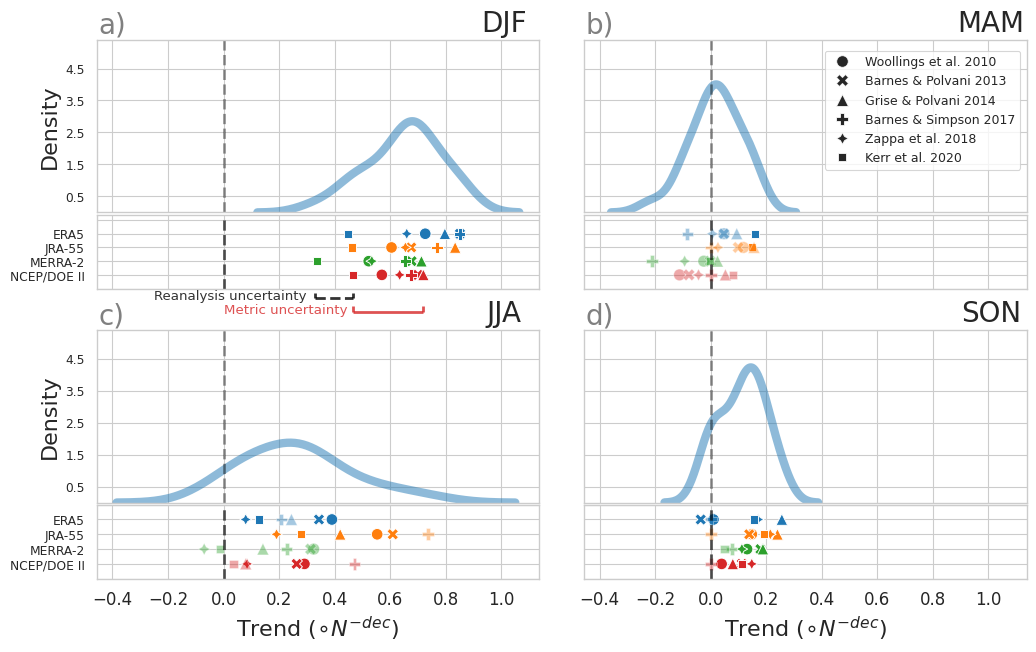

In [25]:
sns.set_style('whitegrid')
sns.set_context('paper')
fig, axes = plt.subplots(5, 2, figsize=(12, 7), sharex=True, height_ratios=[0.7, 0.3, 0.15, 0.7, 0.3])
ymax = 5.4
make_trend_kde(allseasons_jet_lat_trend_df, 'DJF Trend_decade', ymax=ymax, ax=axes[0][0])
make_trend_kde(allseasons_jet_lat_trend_df, 'MAM Trend_decade', ymax=ymax, ax=axes[0][1], labels=False)
make_trend_kde(allseasons_jet_lat_trend_df, 'JJA Trend_decade', ymax=ymax, ax=axes[3][0])
make_trend_kde(allseasons_jet_lat_trend_df, 'SON Trend_decade', ymax=ymax, ax=axes[3][1], labels=False)
make_reanalysis_scatter(allseasons_jet_lat_mean_and_trend_sig_df, 'DJF Trend_decade_sig', alpha=1, ax=axes[1][0])
make_reanalysis_scatter(allseasons_jet_lat_mean_and_trend_sig_df, 'DJF Trend_decade_nonsig', alpha=.4, ax=axes[1][0])
make_reanalysis_scatter(allseasons_jet_lat_mean_and_trend_sig_df, 'MAM Trend_decade_sig', alpha=1, ax=axes[1][1], labels=False)
make_reanalysis_scatter(allseasons_jet_lat_mean_and_trend_sig_df, 'MAM Trend_decade_nonsig', alpha=.4, ax=axes[1][1], labels=False, use_legend=True)
make_reanalysis_scatter(allseasons_jet_lat_mean_and_trend_sig_df, 'JJA Trend_decade_sig', alpha=1, ax=axes[4][0])
make_reanalysis_scatter(allseasons_jet_lat_mean_and_trend_sig_df, 'JJA Trend_decade_nonsig', alpha=.4, ax=axes[4][0])
make_reanalysis_scatter(allseasons_jet_lat_mean_and_trend_sig_df, 'SON Trend_decade_sig', alpha=1, ax=axes[4][1], labels=False)
make_reanalysis_scatter(allseasons_jet_lat_mean_and_trend_sig_df, 'SON Trend_decade_nonsig' ,alpha=.4, ax=axes[4][1], labels=False)

axes[0][0].set_title("DJF", x=.92, size=20)
axes[0][1].set_title("MAM", x=.92, size=20)
axes[3][0].set_title("JJA", x=.92, size=20)
axes[3][1].set_title("SON", x=.92, size=20)

for ax in [axes[2][0], axes[2][1]]:
    ax.grid(False)
    ax.set_facecolor("none")
    ax.get_yaxis().set_ticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
for ax in [axes[4][0], axes[4][1]]:
    ax.set_xlabel(r"Trend ${(\circ N^{-dec})}$", size=16)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12);
    
axes[0][0].text(s="a)", x=-0.45, y=5.6, color='grey', size=20)
axes[0][1].text(s="b)", x=-0.45, y=5.6, color='grey', size=20)
axes[3][0].text(s="c)", x=-0.45, y=5.6, color='grey', size=20)
axes[3][1].text(s="d)", x=-0.45, y=5.6, color='grey', size=20)

axes[1][0].text(s='Reanalysis uncertainty', x=-0.25, y=-0.78, color='k', alpha=.8)
axes[1][0].hlines(-.7, 0.33, 0.465, color='k', linestyle='--', linewidth=2, alpha=.8, clip_on=False)
axes[1][0].vlines(0.33, -.7, -.3, color='k', linestyle='--', linewidth=2, alpha=.8, clip_on=False)
axes[1][0].vlines(0.465, -.7, -.3, color='k', linestyle='--', linewidth=2, alpha=.8, clip_on=False)

axes[1][0].text(s='Metric uncertainty', x=-0., y=-1.78, color='C3', alpha=.8)
axes[1][0].hlines(-1.7, 0.465, 0.719, color='C3', linewidth=2, alpha=.8, clip_on=False)
axes[1][0].vlines(0.465, -1.7, -1.3, color='C3', linewidth=2, alpha=.8, clip_on=False)
axes[1][0].vlines(0.719, -1.7, -1.3, color='C3', linewidth=2, alpha=.8, clip_on=False)

fig_legend = axes[1][1].legend(ncols=1, bbox_to_anchor=[1., 3.3],  fancybox=True, fontsize=9)
for leg_marker in fig_legend.get_lines():
    leg_marker.set_markerfacecolor('k')
    leg_marker.set_alpha(.85)

for ind in range(4):
    axes[ind][0].set_ylim(0, ymax)
    axes[ind][1].set_ylim(0, ymax)
# fig.suptitle("North Pacific Jet", size=24)
fig.subplots_adjust(hspace=.02, wspace=.1)
# fig.savefig('figures/figure_2.png', dpi=300, bbox_inches='tight', transparent=False)

## work out quantative differences:

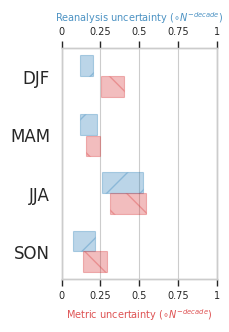

In [33]:
sns.set_context('paper')
fig, ax = plt.subplots(1, figsize=(2, 3))
## Dataset diff (blue)
ax.add_patch(mpatches.Rectangle(xy=(min(seasonal_metric_range['DJF']), 0.975), width=max(seasonal_metric_range['DJF'])-min(seasonal_metric_range['DJF']), height=(0.1), hatch='/', color='C0', alpha=.3, clip_on= True))
ax.add_patch(mpatches.Rectangle(xy=(min(seasonal_metric_range['MAM']), 0.69), width=max(seasonal_metric_range['MAM'])-min(seasonal_metric_range['MAM']), height=(0.1), hatch='/', color='C0', alpha=.3, clip_on= True))
ax.add_patch(mpatches.Rectangle(xy=(min(seasonal_metric_range['JJA']), 0.408), width=max(seasonal_metric_range['JJA'])-min(seasonal_metric_range['JJA']), height=(0.1), hatch='/', color='C0', alpha=.3, clip_on= True))
ax.add_patch(mpatches.Rectangle(xy=(min(seasonal_metric_range['SON']), 0.125), width=max(seasonal_metric_range['SON'])-min(seasonal_metric_range['SON']), height=(0.1), hatch='/', color='C0', alpha=.3, clip_on= True))

## Metric diff (red)
ax.add_patch(mpatches.Rectangle(xy=(min(seasonal_dataset_range['DJF']), 0.875), width=max(seasonal_dataset_range['DJF'])-min(seasonal_dataset_range['DJF']), height=(0.1), hatch='\\', color='C3', alpha=.3, clip_on= True))
ax.add_patch(mpatches.Rectangle(xy=(min(seasonal_dataset_range['MAM']), 0.585), width=max(seasonal_dataset_range['MAM'])-min(seasonal_dataset_range['MAM']), height=(0.1), hatch='\\', color='C3', alpha=.3, clip_on= True))
ax.add_patch(mpatches.Rectangle(xy=(min(seasonal_dataset_range['JJA']), 0.308), width=max(seasonal_dataset_range['JJA'])-min(seasonal_dataset_range['JJA']), height=(0.1),  hatch='\\', color='C3', alpha=.3, clip_on= True))
ax.add_patch(mpatches.Rectangle(xy=(min(seasonal_dataset_range['SON']), 0.025), width=max(seasonal_dataset_range['SON'])-min(seasonal_dataset_range['SON']), height=(0.1), hatch='\\', color='C3', alpha=.3, clip_on= True))

ax.set_yticks(np.linspace(0.125, 0.975, 4), labels=["SON", "JJA", "MAM", "DJF"], size=12)
ax2 = ax.twiny()
ax2.set_xlabel("Reanalysis uncertainty ${(\circ N^{-decade})}$", color='C0', size=7, alpha=.8)
ax.set_xlabel("Metric uncertainty ${(\circ N^{-decade})}$", color='C3', size=7, alpha=.8)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1], [0, 0.25, 0.5, 0.75, 1],  fontsize=7)
ax2.set_xticks([0, 0.25, 0.5, 0.75, 1], [0, 0.25, 0.5, 0.75, 1],  fontsize=7)
ax2.grid(False)
ax.grid(axis='y')
ax.set_xlim(0, 1)
ax.set_ylim(-0.01, 1.11)
# fig.savefig("figures/supp_metric_vs_model.png", dpi=300, bbox_inches='tight')